In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
bank = pd.read_csv("drive/MyDrive/Dataset/Bank customers.csv")
bank.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
bank.shape

(10127, 21)

In [ ]:
# So what we are predicting is card category that the xustomer is going to go for.

In [ ]:
bank.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
# So we will be needing to extract data from income_category columns and other categorical columns, since as you can see the data 
# is in string format and the range is giving, not an exact value which can be feeded into the model directly.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


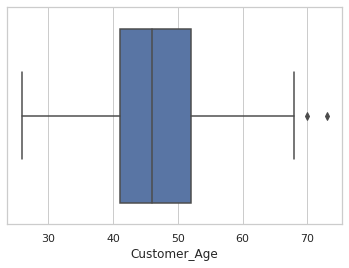

In [ ]:
# Understanding about some columns first.

sns.set_theme(style="whitegrid")
sns.boxplot(bank['Customer_Age'])

In [ ]:
# So most of the customers are somewhere near 45 age, mean being 45 with some outliers that are depicted by the dots on the right
# hand side at age 70 and maybe 75

In [ ]:
bank[['Gender','Credit_Limit']].groupby('Gender').agg(['mean','count'])

Credit_Limit      
                mean count
Gender                    
F        5023.854274  5358
M       12685.674963  4769

In [ ]:
bank[['Gender','Avg_Utilization_Ratio']].groupby('Gender').agg(['mean','count'])

Avg_Utilization_Ratio      
                        mean count
Gender                            
F                   0.341957  5358
M                   0.199548  4769

In [ ]:
# Average Utilization Ratio: it's how much you currently owe divided by your credit limit. It is generally expressed as a percent. 
# For example, if you have a total of $10,000 in credit available on two credit cards, and a balance of $5,000 on one, your credit 
# utilization rate is 50% — you're using half of the total credit you have available. A low credit utilization rate shows you're
# using less of your available credit.

In [ ]:
bank_cards = bank.groupby("Card_Category")
bank_cards['Customer_Age'].max()

Card_Category
Blue        73
Gold        63
Platinum    56
Silver      65
Name: Customer_Age, dtype: int64

In [ ]:
bank_cards['Customer_Age'].min()

Card_Category
Blue        26
Gold        29
Platinum    39
Silver      26
Name: Customer_Age, dtype: int64

In [ ]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
bank_cards['Avg_Utilization_Ratio'].mean()

Card_Category
Blue        0.290859
Gold        0.057103
Platinum    0.043650
Silver      0.057310
Name: Avg_Utilization_Ratio, dtype: float64

In [ ]:
bank_marital = bank.groupby("Marital_Status")

In [ ]:
bank_marital['Card_Category'].value_counts()

Marital_Status  Card_Category
Divorced        Blue              696
                Silver             46
                Gold                5
                Platinum            1
Married         Blue             4433
                Silver            206
                Gold               41
                Platinum            7
Single          Blue             3624
                Silver            251
                Gold               58
                Platinum           10
Unknown         Blue              683
                Silver             52
                Gold               12
                Platinum            2
Name: Card_Category, dtype: int64

In [ ]:
# Now lets move forward and see if we have categorical data in our dataset.

bank.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [ ]:
bank['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# Note here that Attrition Flag has a value Attrited Customer, meaning this particular customer has already closed his/her
# account and is not associated with the bank as of now.
# Now for predicting the card classes, we can remove the people/customers who have attrited or keep it as it is, its your choice.

In [ ]:
bank['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [ ]:
bank['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
bank['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
def ref1(x):
  if x == 'M':
    return 1
  else:
    return 0

bank['Gender'] = bank['Gender'].map(ref1)

In [ ]:
def ref2(x):
  if x == 'Existing Customer':
    return 1
  else:
    return 0

bank['Attrition_Flag'] = bank['Attrition_Flag'].map(ref2)

In [ ]:
# Converting Categorical data into numerical data.

y = bank['Card_Category']
X = bank.copy()
X.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [ ]:
# Extracting data from the Income_Category column

X['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [ ]:
X['Income_Category'] = label_encoded(X['Income_Category'])
X['Education_Level'] = label_encoded(X['Education_Level'])
X['Marital_Status'] = label_encoded(X['Marital_Status'])

X.head(3)

Income_Category ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
Education_Level ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status ['Divorced' 'Married' 'Single' 'Unknown']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [ ]:
X.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
X = X.drop(['CLIENTNUM', 'Card_Category'], axis = 1)

In [ ]:
X.shape

(10127, 19)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 7)
pca2 = PCA(n_components = 10)
pca_fit = pca.fit_transform(X)
pca_fit2 = pca2.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# You can use both of the reduced dataset to see how much accuracy or predictive power of the model is affected.

Xtrain, Xtest, ytrain, ytest = train_test_split(pca_fit2, y, test_size=0.2, random_state = 42)

In [ ]:
random_model = RandomForestClassifier(n_estimators=300, n_jobs = -1)

In [ ]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

100.0 %


In [ ]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

95.41 %


In [ ]:
# Save the trained model as a pickle string.
import pickle 

saved_model = pickle.dump(random_model, open('drive/MyDrive/Dataset/Models/BankCards.pickle','wb'))

saved_pca = pickle.dump(pca2, open('drive/MyDrive/Dataset/Models/BankCardsPCA.pickle','wb'))